## 1. Iris 데이터셋을 활용해 클래스별 변수 평균 차이를 검정

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### 1. 구조 확인

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2. 기술 통계량 산출

In [5]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [6]:
iris.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [7]:
iris.groupby('species').agg(['min', 'max']).reset_index()

species sepal_length      sepal_width      petal_length       \
                       min  max         min  max          min  max   
0      setosa          4.3  5.8         2.3  4.4          1.0  1.9   
1  versicolor          4.9  7.0         2.0  3.4          3.0  5.1   
2   virginica          4.9  7.9         2.2  3.8          4.5  6.9   

  petal_width       
          min  max  
0         0.1  0.6  
1         1.0  1.8  
2         1.4  2.5

In [8]:
iris.groupby('species').quantile([0.25, 0.5, 0.75]) # type: ignore

sepal_length  sepal_width  petal_length  petal_width
species                                                              
setosa     0.25         4.800        3.200         1.400          0.2
           0.50         5.000        3.400         1.500          0.2
           0.75         5.200        3.675         1.575          0.3
versicolor 0.25         5.600        2.525         4.000          1.2
           0.50         5.900        2.800         4.350          1.3
           0.75         6.300        3.000         4.600          1.5
virginica  0.25         6.225        2.800         5.100          1.8
           0.50         6.500        3.000         5.550          2.0
           0.75         6.900        3.175         5.875          2.3

### 3. 시각화

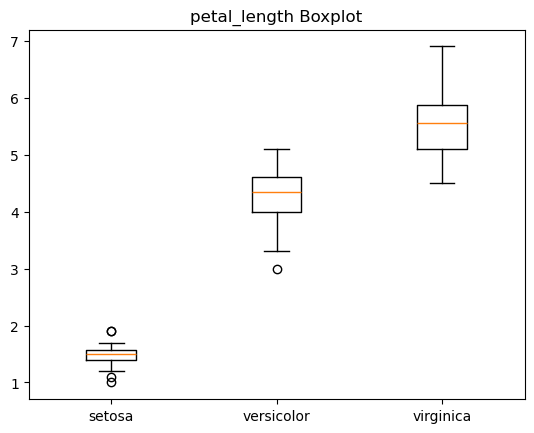

In [17]:
plt.boxplot([    
    iris[iris['species'] == 'setosa']['petal_length'],
    iris[iris['species'] == 'versicolor']['petal_length'],
    iris[iris['species'] == 'virginica']['petal_length']],)

plt.title('petal_length Boxplot')
plt.xticks([1, 2, 3], ['setosa', 'versicolor', 'virginica'])
plt.show()

- 평균이 setosa, versicolor, virginica 순으로 커진다. 
- setosa는 Q3-Q1 길이가 짧다.
- setosa는 outlier까지 포함해도 max가 다른 품종의 min 보다 작다.

### 4. 정규성 검정

모든 종의 모든 변수에 다음과 같은 가설검정을 실시한다.

$ H_0: $ 데이터가 정규 분포를 따른다. \
$ H_1: $ 데이터가 정규 분포를 따르지 않는다.

In [10]:
for specie in iris.species.unique():
    print('=' * 10 + f'{specie=}' + '=' * 10)

    for col_name in iris[iris['species'] == specie].columns[:-1]:
        p = stats.shapiro(iris[iris['species'] == specie][col_name]).pvalue
        print(f'{col_name}\t{p=:.5f}')

==========specie='setosa'==========
sepal_length	p=0.45951
sepal_width	p=0.27153
petal_length	p=0.05481
petal_width	p=0.00000
==========specie='versicolor'==========
sepal_length	p=0.46474
sepal_width	p=0.33800
petal_length	p=0.15848
petal_width	p=0.02728
==========specie='virginica'==========
sepal_length	p=0.25831
sepal_width	p=0.18090
petal_length	p=0.10978
petal_width	p=0.08695


versicolor의 petal width와 setosa의 petal width가 정규성을 띄지 않는 것 같다.

### 5. 등분산성 검정

모든 변수에 다음과 같은 가설검정을 실시한다.

$ H_0: $ 서로다른 종 3개의 특정 변수의 분산은 같다. \
$ H_1: $ 적어도 하나의 종의 특정 변수의 분산은 다르다.

In [13]:
for col_name in iris.columns[:-1]:
    result = stats.levene(iris[iris['species'] == 'setosa'][col_name],
                          iris[iris['species'] == 'versicolor'][col_name],
                          iris[iris['species'] == 'virginica'][col_name])
    print(f'{col_name}\t{result.pvalue:.5f}')

sepal_length	0.00226
sepal_width	0.55552
petal_length	0.00000
petal_width	0.00000


sepal_width 는 등분산을 만족하는것 같고, 나머지 값들은 등분산을 만족하지 못하는거 같다.

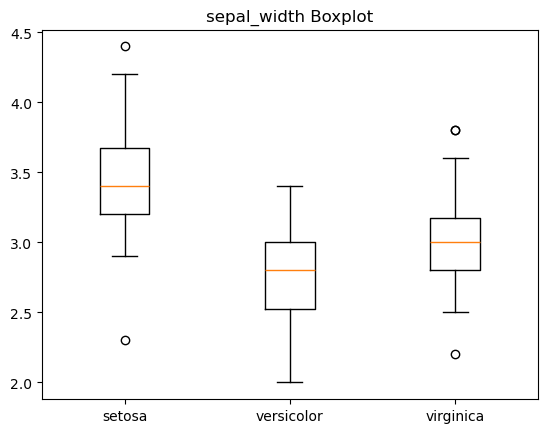

In [15]:
plt.boxplot([    
    iris[iris['species'] == 'setosa']['sepal_width'],
    iris[iris['species'] == 'versicolor']['sepal_width'],
    iris[iris['species'] == 'virginica']['sepal_width']],)

plt.title('sepal_width Boxplot')
plt.xticks([1, 2, 3], ['setosa', 'versicolor', 'virginica'])
plt.show()

sepal_width 의 Boxplot과 위에서 구한 petal_length의 Boxplot을 비교하니 일리가 있는거 같다.

### 6. 가설 수립

어떤 그룹의 Petal Length가 유의하게 긴지/짧은지 알아보고싶다.

그러므로 가설을 setosa, versicolor, virginica 의 Petal Length 모평균을 각각 $\mu_1, \mu_2, \mu_3$로 두고 가설을 수립하면

$H_0: \mu_1 = \mu_2 = \mu_3$ \
$H_1:$ 최소한 하나의 $\mu_n$은 다르다.

### 7. ANOVA 실행

In [19]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [20]:
lmodel = ols('petal_length ~ C(species)', data=iris).fit()
print(anova_lm(lmodel, typ=1))

               df    sum_sq     mean_sq            F        PR(>F)
C(species)    2.0  437.1028  218.551400  1180.161182  2.856777e-91
Residual    147.0   27.2226    0.185188          NaN           NaN


F값이 1180, p값이 2.856777e-91. 그러므로 귀무가설을 기각한다.\
즉, 세 종의 petal_length는 적어도 하나가 다르다.

### 8. Tukey

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(iris['petal_length'], iris['species'], alpha=0.05)
print(posthoc)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


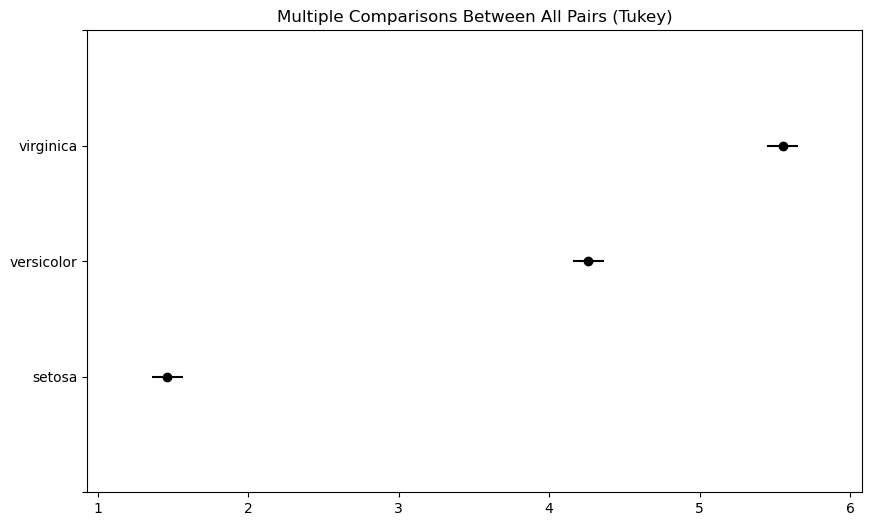

In [22]:
fig = posthoc.plot_simultaneous()

Tukey 결과, 세 품종의 petal_length의 평균은 모든 쌍에서 유의미한 차이를 보였고, \
오름차순으로 정렬하면 setosa, versicolor, virginica 순이였다.

### 9. 결과 요약

Boxplot의 결과로 우리는 setosa가 다른 두 종과 확연히 분리될 정도의 작은 petal_length를 가진다는것과 대략적인 평균의 차이를 알았다. 또한 ANOVA를 통해서 세 종의 품종중 적어도 하나는 유의미한 차이를 가진다는것과, tukey 결과에서 세 쌍의 품종 비교에서 모두 귀무가설을 기각하는것을 보았다.

결론: 오름차순으로 setosa, versicolor, virginica 가 통게적으로 유의미한 차이의 petal_length평균의 차이를 보였다.

### A. 참고 문헌

[https://partrita.github.io/posts/post-hoc-analysis/](https://partrita.github.io/posts/post-hoc-analysis/)